In [1]:
import MDAnalysis as mda
from MDAnalysis.analysis import align
import matplotlib.pyplot as plt
%matplotlib inline
from MDAnalysis.analysis.rms import RMSF

# based on the example from https://www.mdanalysis.org/pmda/api/rmsf.html

In [2]:
def plot_RMSF(top, traj, selection1, selection2, params=None):
    if params == None:
        params = {
    'axes.labelsize': 8,
    'legend.fontsize': 10,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'text.usetex': False,
    'figure.figsize': [4.5, 4.5],
    'figure.dpi':300
    }
    plt.rcParams.update(params)
    u = mda.Universe(top, traj)
    protein = u.select_atoms(selection1)
# Fit to the initial frame to get a better average structure
# (the trajectory is changed in memory)
    prealigner = align.AlignTraj(u, u, select=selection2,
                             in_memory=True).run()
# ref = average structure
    ref_coordinates = u.trajectory.timeseries(asel=protein).mean(axis=1)
# Make a reference structure (need to reshape into a
# 1-frame "trajectory").
    ref = mda.Merge(protein).load_new(ref_coordinates[:, None, :],
                                  order="afc")
    calphas = protein.select_atoms(selection2)
    rmsfer = RMSF(calphas, verbose=True).run()
    plt.plot(calphas.resnums, rmsfer.rmsf)
    plt.ylabel("RMSF ($\AA$)")
    plt.xlabel(r"Residue ID")

Step 50001/50001 [100.0%]


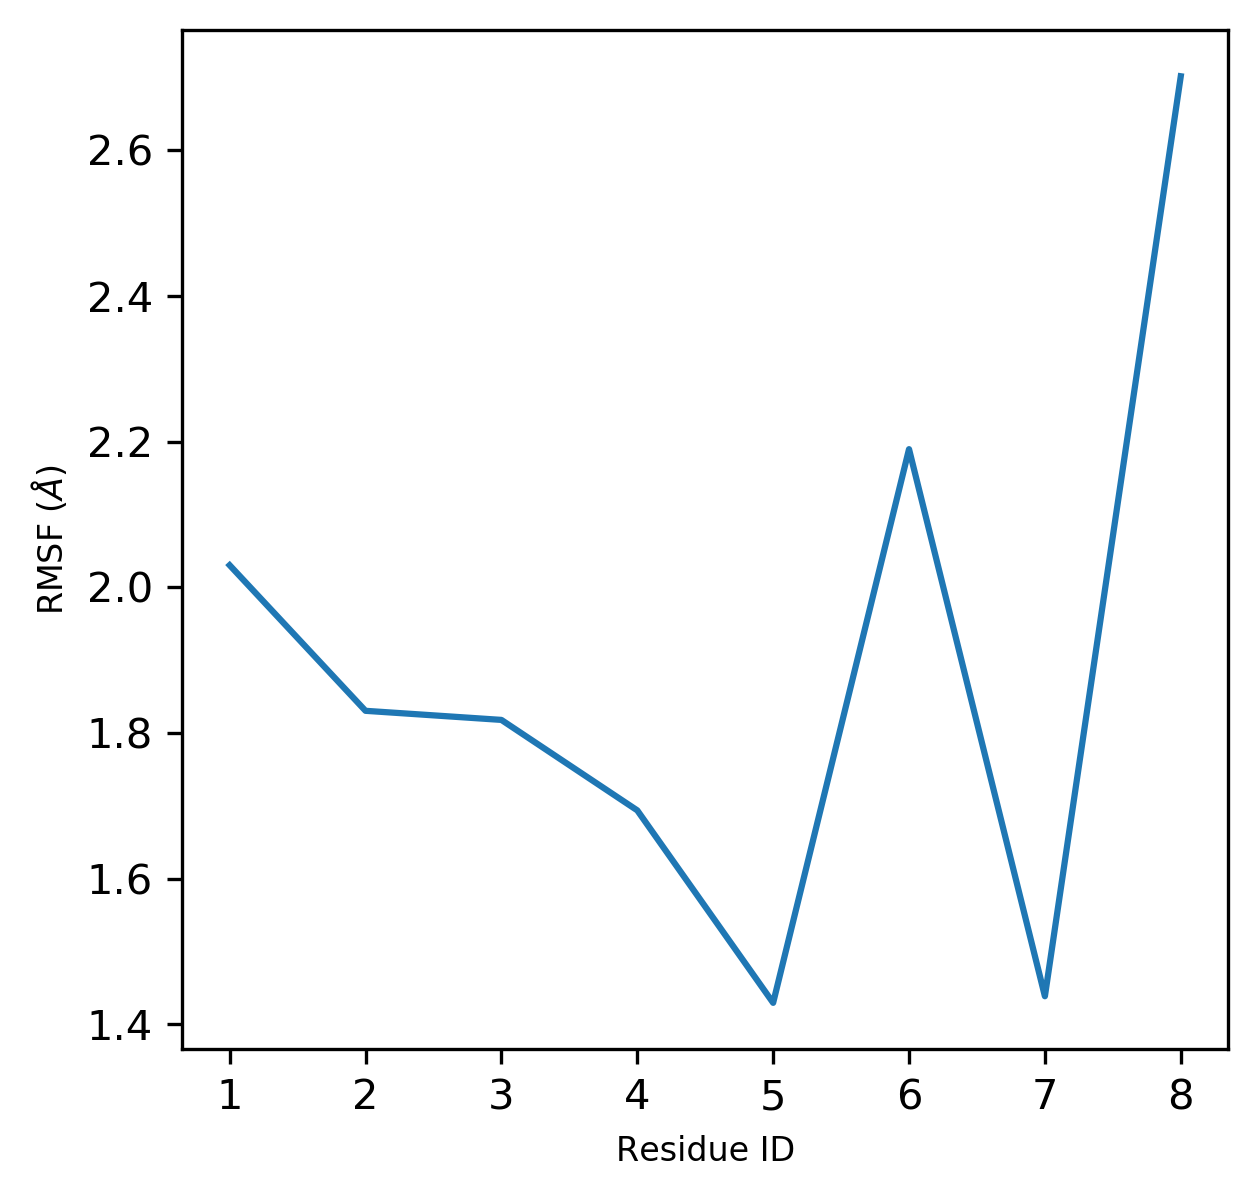

In [3]:
d = {'top':"./apdtrpap/datasets/Trajectory_select_and_merge_on_data_3_and_data_1_90.pdb" ,
    'traj': "./apdtrpap/datasets/Trajectory_select_and_merge_on_data_3_and_data_1_91.dcd",
     'selection1':"segid PROA",
     'selection2':"segid PROA and name CA"}
plot_RMSF(d['top'],d['traj'],d['selection1'],d['selection2'])

Step 50001/50001 [100.0%]


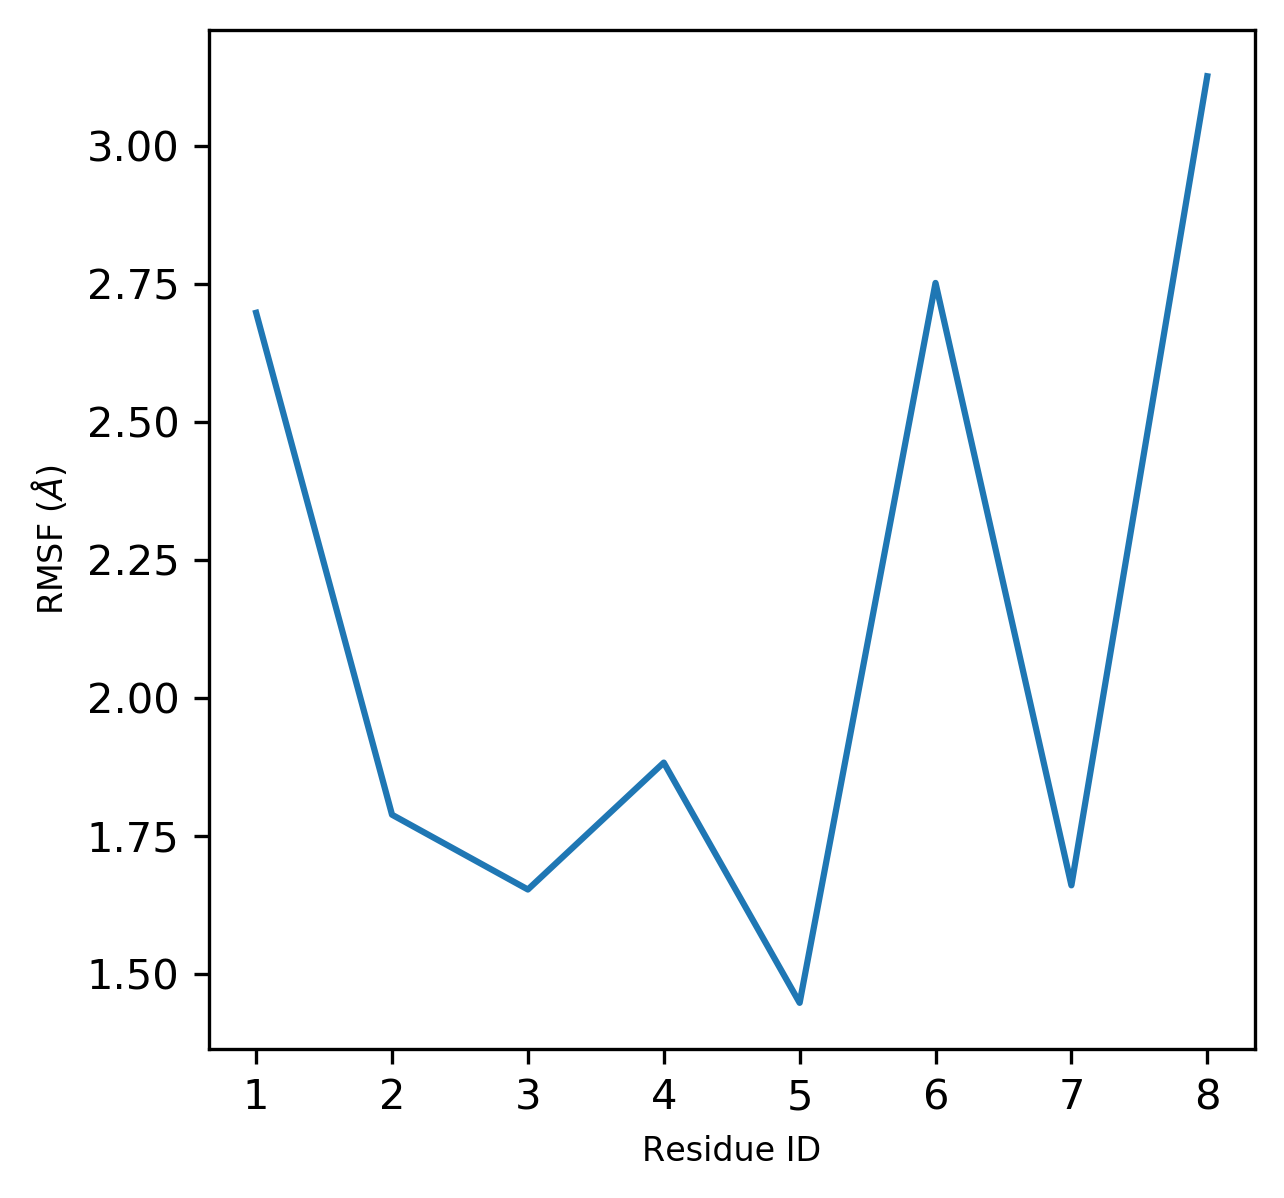

In [4]:
d = {'top':"./apdtrpap_Tn/datasets/Trajectory_select_and_merge_on_data_3_and_data_1_6.pdb" ,
    'traj': "./apdtrpap_Tn/datasets/Trajectory_select_and_merge_on_data_3_and_data_1_7.dcd",
     'selection1':"segid PROA",
     'selection2':"segid PROA and name CA"}
plot_RMSF(d['top'],d['traj'],d['selection1'],d['selection2'])

Step 21356/21356 [100.0%]


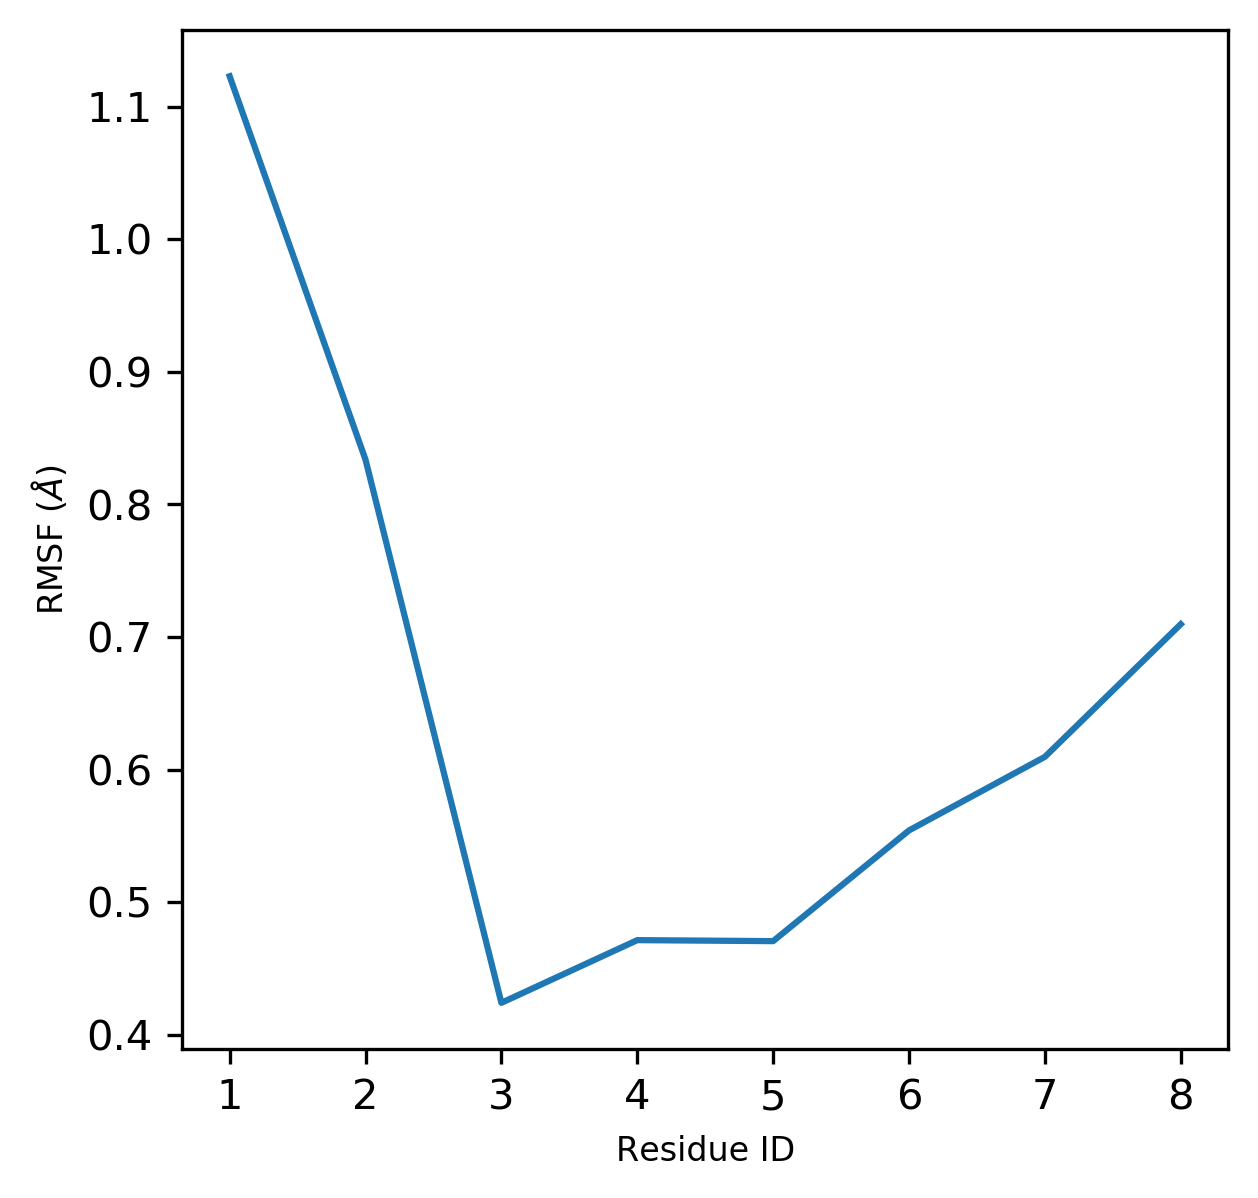

In [5]:
d = {'top':"./ar20.5_apdtrpap/datasets/Trajectory_selection_and_merge_on_data_3_and_data_1_6.pdb" ,
    'traj': "./ar20.5_apdtrpap/datasets/Trajectory_selection_and_merge_on_data_3_and_data_1_7.dcd",
     'selection1':"segid PROF",
     'selection2':"segid PROF and name CA"}
plot_RMSF(d['top'],d['traj'],d['selection1'],d['selection2'])

Step 21568/21568 [100.0%]


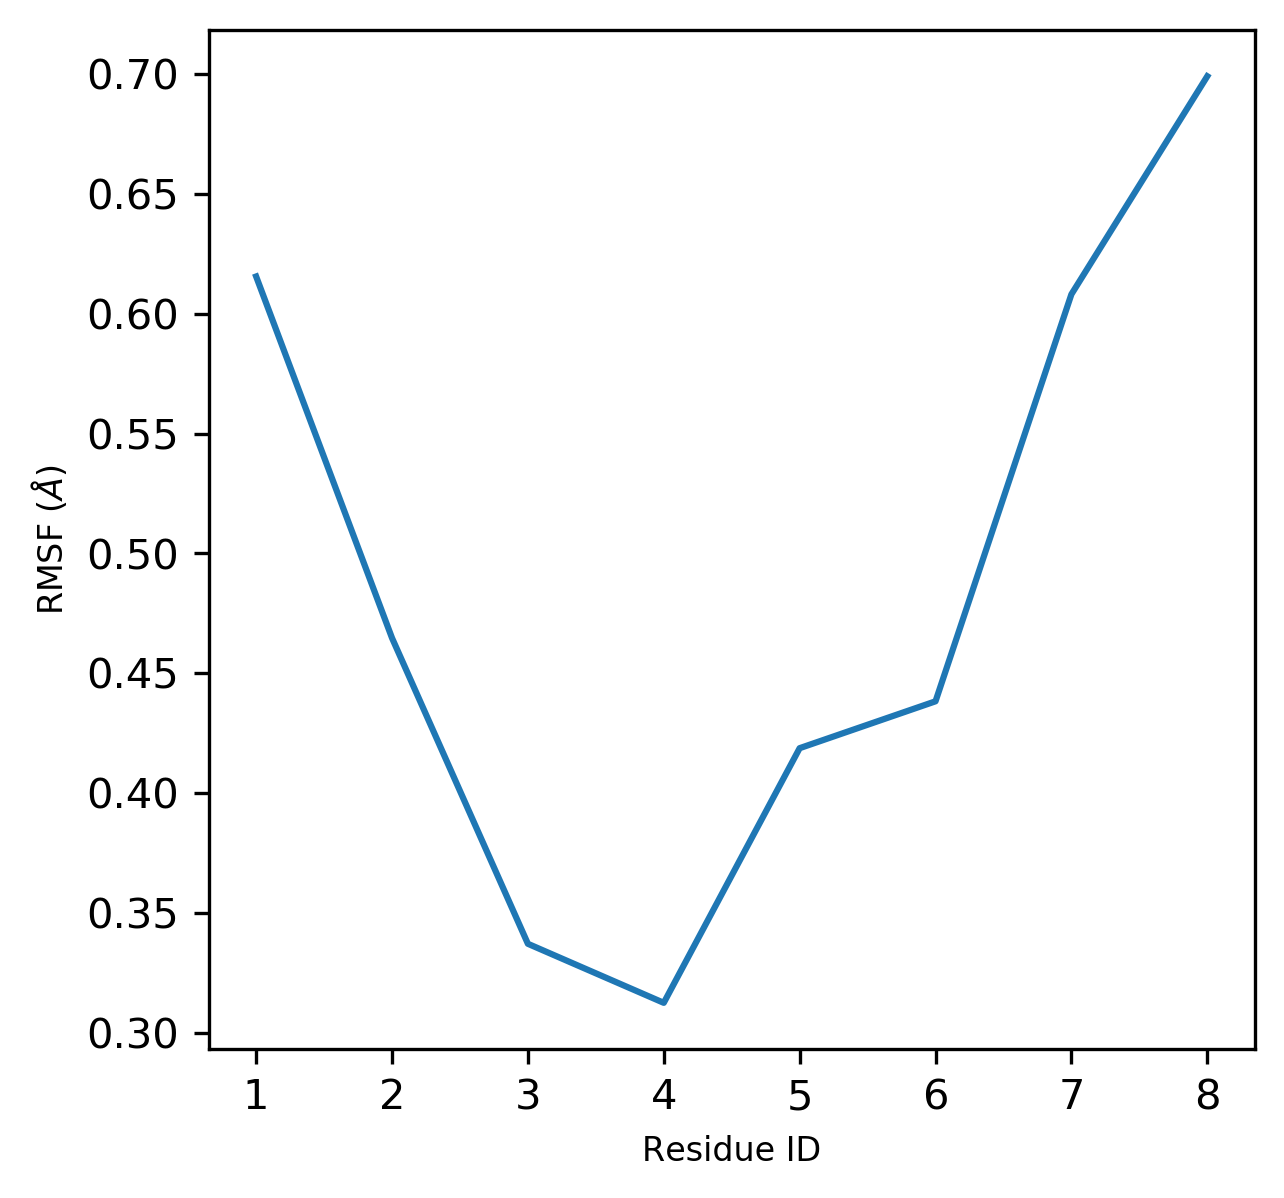

In [6]:
d = {'top':"./ar20.5_apdtrpap_Tn/datasets/Trajectory_selection_and_merge_on_data_3_and_data_1_6.pdb" ,
    'traj': "./ar20.5_apdtrpap_Tn/datasets/Trajectory_selection_and_merge_on_data_3_and_data_1_7.dcd",
     'selection1':"segid PROF",
     'selection2':"segid PROF and name CA"}
plot_RMSF(d['top'],d['traj'],d['selection1'],d['selection2'])